In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

data = pd.read_csv("bodyPerformance.csv")

y = data["class"]
categorical_columns = ["gender"]
numeric_columns = ["age", "height_cm", "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce"]

scaler = StandardScaler()
numeric_data = scaler.fit_transform(data[numeric_columns])

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = np.concatenate([encoded_columns, numeric_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Řešení kvízu z osmé lekce

## Část 1

### Otázka 1

Pomocí několika vět stručně popiš, jak funguje algoritmus Support Vector Machine.

*Pomocí algoritmu můžeme rozdělit hodnoty vstupních proměnných do pozitivní a negativní nadroviny. Algoritmus je založený na vzdálenosti v nějakém prostoru.*

### Otázka 2

V rámci lekce jsme si říkali o dvou typech v závislosti na tom, jestli jsou v každé části rozděleného prostoru hodnoty pouze z jedné skupiny. Napiš, jak se označuje typ marginu na obrázku níže.

![picture_1.png](picture_1.png)

*soft margin*

## Část 2

Pro druhou část si stáhni data ze souboru o fyzické kondici, která byla změřená jihokorejskou organizací Korea Sports Promotion Foundation. Data obsahují různé vstupní hodnoty a výstupní hodnotu, kterou je zařazení jedince do jedné ze čtyř výkonnostních tříd.

- age = věk (20 až 64 let),
- gender = pohlaví (F, M),
- height_cm = výška v cm,
- weight_kg = hmotnost v kg,
- body_fat_% = tělesný tuk v procentech,
- distolic = diastolický krevní tlak (min),
- systolic = systolický krevní tlak (min),
- gripForce = síla stisku,
- sit and bend forward_cm = sed a předklon v cm,
- sit-ups counts = počty sedů-lehů,
- broad jump_cm = skok do dálky v cm,
- class  = třída fyzické výkonnosti (4 třídy, A je nejlepší a D nejhorší).

Dále si otevři Jupyter notebook kviz.ipynb a překopíruj si kód k sobě.

### Otázka 3

Chceme data klasifikovat do čtyř různých skupin. Které z následujících tvrzení je pravdivé?

*Algoritmus K Nearest Neighbors bude řešit takovou úlohu přímo, tj. stejným způsobem, jako by řešil rozdělení do dvou skupin.*

### Otázka 4

Chceme data klasifikovat do čtyř různých skupin. Které z následujících tvrzení je pravdivé?

*Algoritmus Support Vector Machine  bude řešit takovou úlohu nepřímo, tj. převede si úlohu na řešení několika úloh s binární klasifikací*

### Otázka 5

Pokud nějaký algoritmus neřeší klasifikační úlohu přímo, může využít jednu ze dvou strategií, které jsme si ukazovali v lekci. Strategie One-to-One vytvoří klasifikátor pro každou dvojici tříd, pro které klasifikaci provádíme. Jak se nazývá druhá strategie, kterou jsme si popisovali?

*one-to-rest*

### Otázka 6

Napiš kód, který bude klasifikovat člověka na základě vstupních hodnot do jedné ze čtyř tříd fyzické výkonnosti. Využij algoritmus SVM a strategii One-to-One.

In [6]:
from sklearn.svm import LinearSVC, SVC
clf = SVC(kernel = "linear", decision_function_shape="ovo", random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Otázka 7

Vytvoř si matici záměn a zjisti z ní, kolik lidí, kteří ve skutečnosti patří do skupiny A, bylo zařazeno do skupiny B.

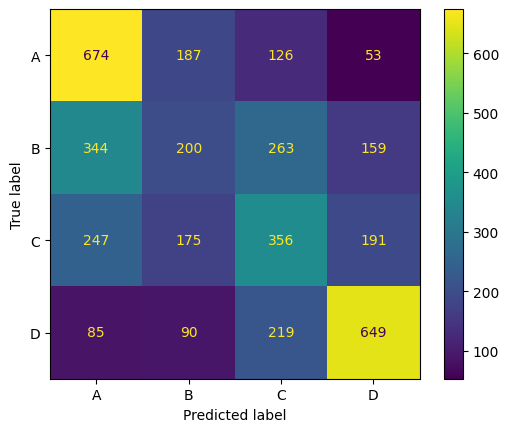

In [7]:
ConfusionMatrixDisplay.from_estimator(clf,X_test, y_test)

*187*

### Otázka 8

Nyní napiš kód, který bude využívat algoritmus KNN pro klasifikaci dat. Pomocí GridSearchCV najdi ideální hodnotu počtu uvažovaných "sousedů". Pro optimalizaci využij metriku Accuracy. Uvažuj všechny hodnoty mezi 1 a 30 (tj. nikoli pouze sudé hodnoty).

In [8]:
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.model_selection import GridSearchCV    
model=KNeighborsClassifier()
params={"n_neighbors": range(1,30)}    
scaler=StandardScaler()
X_fit=scaler.fit_transform(X)
clf=GridSearchCV(model,params,scoring="accuracy")
clf.fit(X_fit, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)}, scoring='accuracy')

### Otázka 9

Jakou hodnotu metriky Accuracy našel GridSearchCV?

In [9]:
clf.best_score_

0.4498612420170602

### Otázka 10

Jaký počet sousedů je podle GridSearchCV ideální pro hodnotu metriky Accuracy?

In [10]:
clf.best_params_

{'n_neighbors': 29}

## Část 3

### Otázka 11

Podívej se na obrázek níže, který obsahuje červený margin, který odděluje dvě skupiny trénovacích dat. Který margin podle tebe ilustruje problém označovaný jako overtiffting?

Po si nejsi jistý/jistá, podívej se do článku, ze kterého obrázek pochází.

![overfitting.png](overfitting.png)

*vpravo*

### Otázka 12

Čím podle tebe pomáhá GridSearchCV omezit problém s overfitting?

*Provádí více rozdělení na testovací a trénovací data, takže optimální hodnota parametru není závislá na jednom rozdělení dat na trénovací a testovací.*